In [67]:
import zipfile as zp
import numpy as np
import statistics as st 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
path =   r"..\ages\ages.csv"
path2 =  r"..\lonelinessData\msoa_loneliness.csv"

ages = pd.read_csv(path)
loneliness = pd.read_csv(path2)
loneliness.drop(['objectid', 'msoa11nm', 'msoa11nmw','st_areasha','st_lengths','geometry','loneills_2018_class','Unnamed: 0'	], axis=1,inplace=True)


cols = ['2','7','12','17','22','27','32','37','42','47','52','57','62','67','72','77','82','87','92']
ages[cols] = ages[cols].astype(str)
ages[cols] = ages[cols].apply(lambda x: x.str.replace(',', ''))

ages[cols] = ages[cols].apply(pd.to_numeric, errors='coerce', axis=1)
ages['65+'] = ages['67']+ages['72']+ages['77']+ages['82']+ages['87']+ages['92']
ages['25-'] = ages ['2']+ages['7']+ages['12']+ages['17']+ages['22']


medians = []
colnames = ages.columns.values.tolist()
X = [int(x) for x in colnames[3:-2]]
for i in range(ages.shape[0]):
    f = ages.iloc[i,3:-2].values.tolist()
    f = [int(i) for i in f]


    Y = [item for i,item in enumerate(X)
                for count in range(f[i])]

    width = 5
    median = st.median_grouped(Y, width)
    medians.append(median)


ages['meds'] = medians

In [69]:
ages.drop(['2','7','12','17','22','27','32','37','42','47','52','57','62','67','72','77','82','87','92'],axis = 1,inplace=True)

df = loneliness.merge(ages, how='inner', left_on='msoa11cd', right_on='MSOA Code')
df.drop(['msoa11cd'],axis=1,inplace= True)

indexNames = df[ df['loneills_2018'] >=4  ].index
df.drop(indexNames , inplace=True)


df['All Ages'] = df['All Ages'].apply(lambda x: x.replace(',', ''))
df = df.astype({'All Ages': 'int64'})
df['oldPC'] = df['65+']/df['All Ages']
df['youngPC'] = df['25-']/df['All Ages']
df = df.astype({'oldPC': 'float64'})
df = df.astype({'youngPC': 'float64'})


In [70]:
print(df[['loneills_2018', 'youngPC','oldPC', 'meds']].describe())

print("\nPearson's Correlation Coeff: ", df['loneills_2018'].corr(df['meds']))




       loneills_2018      youngPC        oldPC         meds
count    6746.000000  6746.000000  6746.000000  6746.000000
mean        0.010790     0.291659     0.191825    41.384739
std         1.212813     0.059006     0.070666     6.927045
min        -5.297125     0.119985     0.004425    21.734766
25%        -0.680101     0.254685     0.138725    36.203190
50%        -0.003611     0.283085     0.190816    41.270721
75%         0.742733     0.316532     0.240363    46.528325
max         3.982479     0.839012     0.537417    66.338690

Pearson's Correlation Coeff:  0.1681219651989397


In [71]:
msoa_la_code_df = pd.read_csv(r'..\area_converters\PCD_OA_LSOA_MSOA_LAD_FEB22_UK_LU.csv', encoding='latin-1')
msoa_code_rows = msoa_la_code_df.loc[msoa_la_code_df['msoa11cd'].isin(df['MSOA Code'])]
msoa_code_conv = dict(zip(msoa_code_rows['msoa11cd'],msoa_code_rows['ladcd']))
df['LA code'] = df['MSOA Code'].apply(lambda x: msoa_code_conv[x])
df = df.groupby('LA code').mean()
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,loneills_2018,All Ages,65+,25-,meds,oldPC,youngPC
LA code,,,,,,,
E06000001,-0.542761,7819.666667,1530.916667,2265.916667,40.914654,0.192425,0.291151
E06000002,0.575800,7472.833333,1241.222222,2489.111111,38.022965,0.173324,0.325616
E06000003,0.649266,7222.526316,1646.736842,1957.157895,44.315926,0.227442,0.272533
E06000004,0.635474,8225.791667,1539.500000,2373.250000,41.914379,0.198321,0.282187
E06000005,0.967079,7160.133333,1475.400000,1995.066667,42.795048,0.204487,0.277309


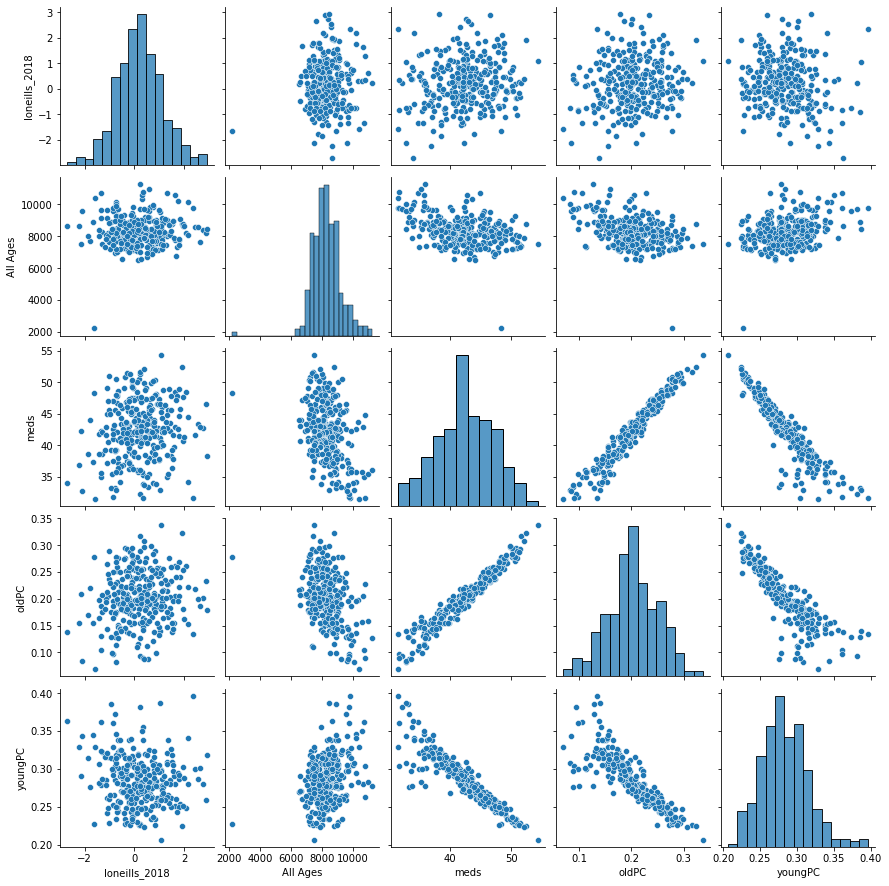

In [72]:
sns.pairplot(df.drop(['65+','25-'],axis=1))
df.to_csv('populationData.csv',index=True)